# Energy data hack 
Challenge 1 : Interception des ondes radios sur les capteurs d’énergies


## Partie 1 : Analyse des données 

# Membres : 
- Maxence Brugères (Telecom Paris & Sciences Po)
- Clément Bernard (Telecom Paris & Polytechnique Montréal)
- Inès Benito (ENSTA Bretagne)
- Corentin Lestrat (ENSTA BRETAGNE)



![picture](https://github.com/clementbernardd/hackaton_ondes/raw/main/images/logo_hackaton.png)

# Importations of data and libraries

In [1]:
# Obtention des données 
!wget https://github.com/clementbernardd/hackaton_ondes/raw/main/Hackaton.zip
!unzip  Hackaton.zip
import sys
sys.path.append('/content/Hackaton/python')
from read_pics import  * 

import os 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
# from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 

--2021-04-04 16:13:54--  https://github.com/clementbernardd/hackaton_ondes/raw/main/Hackaton.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/clementbernardd/hackaton_ondes/main/Hackaton.zip [following]
--2021-04-04 16:13:54--  https://raw.githubusercontent.com/clementbernardd/hackaton_ondes/main/Hackaton.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13275917 (13M) [application/zip]
Saving to: ‘Hackaton.zip’

Hackaton.zip        100%[===================>]  12.66M  27.0MB/s    in 0.5s    

2021-04-04 16:13:55 (27.0 MB/s) - ‘Hackaton.zip’ saved [13275917/13275917]

Archive:  Hackaton.zip


## Load the login and mdp

In [2]:
pics_login, info = get_pics_from_file(os.path.join('Hackaton', 'data','pics_LOGINMDP.bin'))

## Plot an example of data

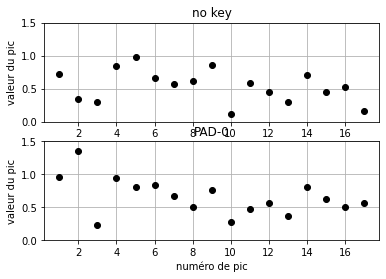

In [3]:
pics_nokey, info = get_pics_from_file(os.path.join('Hackaton', 'data','pics_NOKEY.bin'))
pics_pad0, info = get_pics_from_file(os.path.join('Hackaton', 'data','pics_0.bin'))

######### Pics ############
# NO KEY
plt.figure(1)
plt.subplot(211)
plt.plot(range(1,info["nb_pics"]+1), pics_nokey[0], 'ko')
plt.xlabel('numéro de pic')
plt.ylabel('valeur du pic')
plt.title('no key')
plt.ylim(0, 1.5)
plt.grid(b=True, which='both')
# PAD-0
plt.subplot(212)
plt.plot(range(1,info["nb_pics"]+1), pics_pad0[0], 'ko')
plt.xlabel('numéro de pic')
plt.ylabel('valeur du pic')
plt.title('PAD-0')
plt.ylim(0, 1.5)
plt.grid(b=True, which='both')
#
plt.show()

## Dictionnary to map the data into letters and classes

In [4]:
def letter_range(start, stop="{", step=1):
    for ord_ in range(ord(start.upper()), ord(stop.upper())+1, step):
        yield chr(ord_)
        
keys = ['NOKEY','0','1','2','3','4','5','6','7','8','9'] + list(letter_range("A", "Z")) + ['ENTER','CTRL','SHIFT','SPACE','SUPPR']
class_to_letter = {i : keys[i] for i in range(len(keys)) }
letter_to_class = {class_to_letter[i] : i for i in class_to_letter}
name_to_class = {'pics_'+letter+'.bin' : letter_to_class[letter] for letter in letter_to_class}

In [5]:
class_to_letter_pd = {'Labels' : list(class_to_letter.keys()), 'Touche pressée' :  list(class_to_letter.values())}
pd.DataFrame(class_to_letter_pd, index = None ).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
Labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
Touche pressée,NOKEY,0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,ENTER,CTRL,SHIFT,SPACE,SUPPR


## Convert the data into X and Y 

In [6]:
def get_data(name_to_class = name_to_class) : 
  ''' Return training dataset '''
  data = []
  labels = []
  for name in name_to_class : 
    
    pics, info = get_pics_from_file(os.path.join('Hackaton','data', name))
    for trame in pics : 
      data.append(trame)
      labels.append(name_to_class[name])      

  return np.array(data), np.array(labels)

In [7]:
data, labels = get_data()

## Statistic study 

In [8]:
# Get the data for each label
data_box = {i : data[np.where(labels == i)[0]] for i in range(42)}
# Get the data for each pic 
data_box = {i : {j : data_box[j][:,i] for j in data_box}   for i in range(17)}

In [12]:
def get_box_17(data_box, class_to_letter = class_to_letter) : 
  ''' Return box plot for the given pic '''
  figure, ax = plt.subplots(figsize = (24,16) , nrows=6,ncols=3)
  ax = np.array(ax)
  
  for i,pic in enumerate(data_box) :
    
    data = list(data_box[pic].values())
    bp = ax.flatten()[i].boxplot(data )
    ax.flatten()[i].set_xticklabels(list(class_to_letter.values()),rotation=45, fontsize=8)
    ax.flatten()[i].set_xlabel('Labels')
    ax.flatten()[i].set_title('Pic : {}'.format(pic+1))

  plt.tight_layout()
  plt.savefig('box_plot_17.png')
  plt.show()  


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

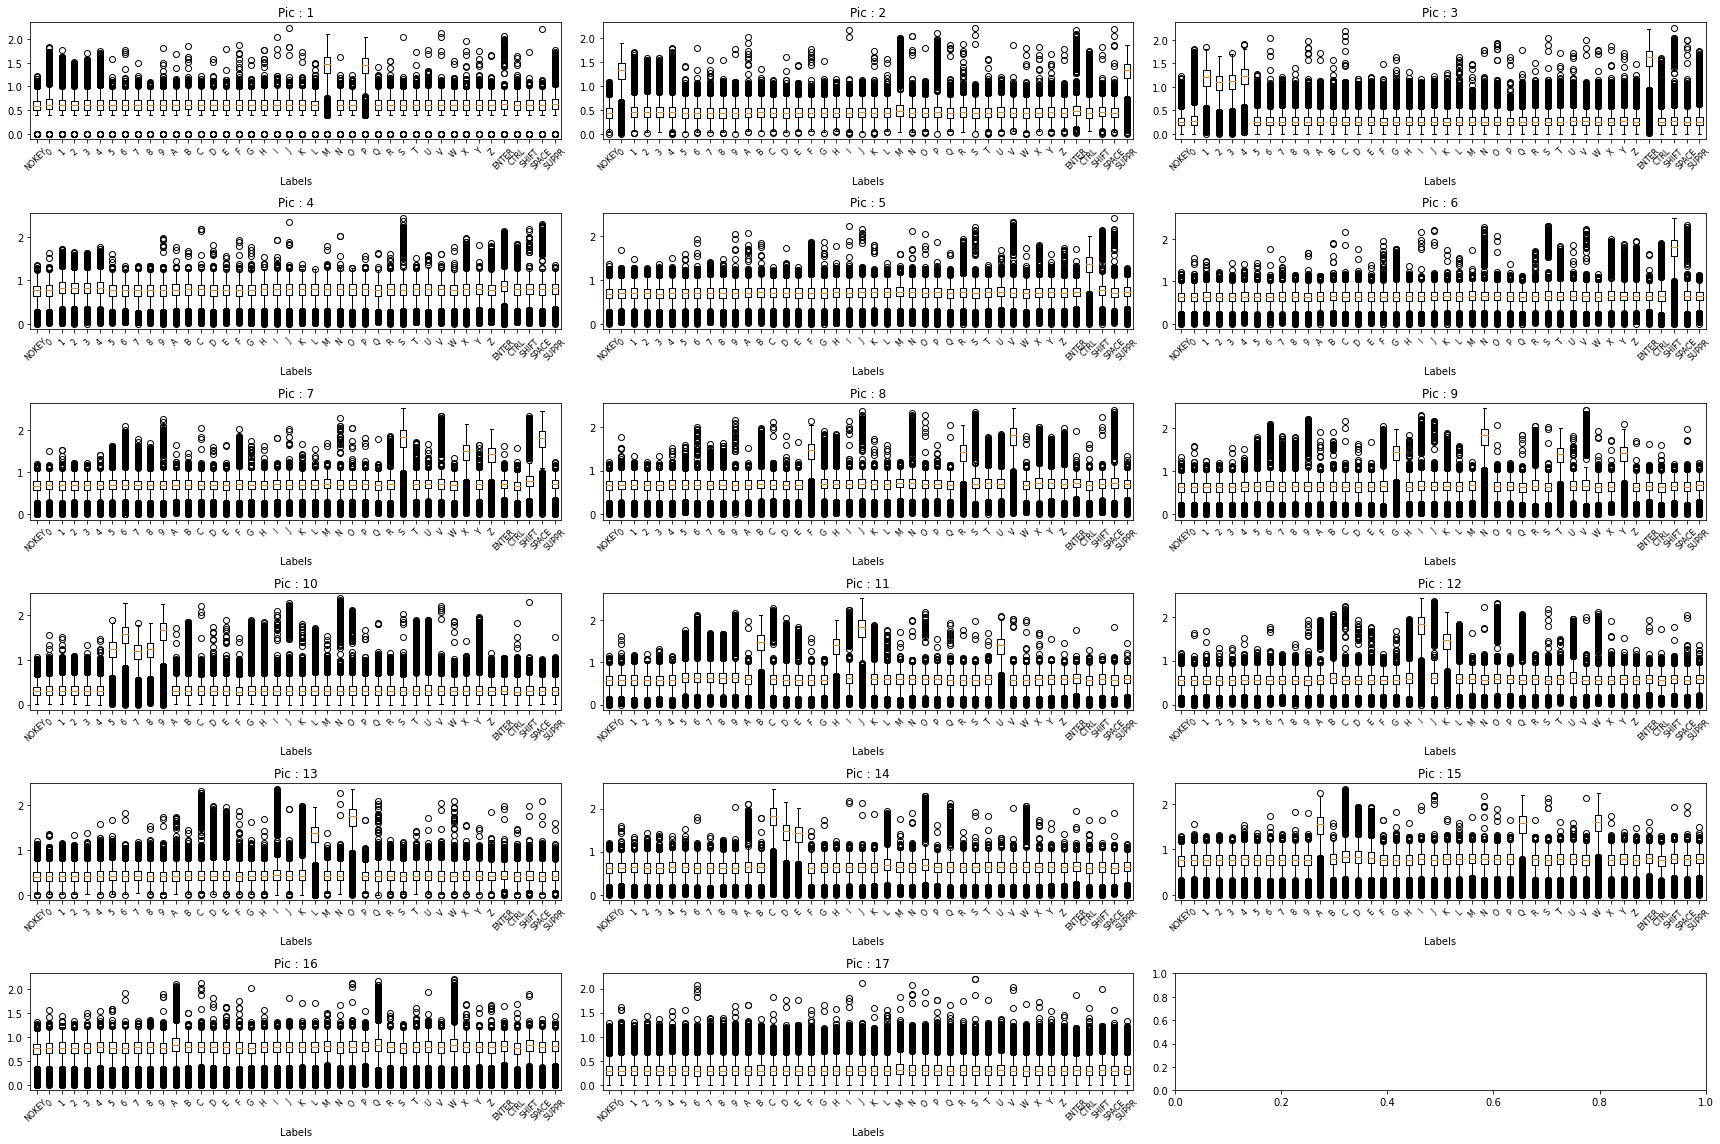

In [13]:
get_box_17(data_box)

## Get distance between each label

In [11]:
def get_avg_trame(signal , N = 100) : 
  ''' Return a trame of size N x 17 of an average of the trame '''
  number_trames = int(signal.shape[0]/N)
  trames = np.zeros((number_trames,N, 17))
  
  for i in range(number_trames) : 
    
    s = signal[i * N : (i+1) * N ]

    trames[i,:] = s
    
  return np.average(trames,axis = 0)

In [12]:
def get_distance_digits(data = data, labels = labels, distance = mean_squared_error) : 
  ''' Return the distance between each digit 
      - distance can be : mean_squared_error or cosine_similarity 
  '''
  distance_matrix = np.zeros((42,42))

  letter_indexes = {i : np.where(labels == i)[0] for i in range(42)}
  avg_trames = [get_avg_trame(data[letter_indexes[i]]) for i in letter_indexes]

  # Check if this is cosine distance : 
  if distance.__name__ == 'cosine_similarity' : 
    avg_trames = np.array(avg_trames).reshape(42,-1)
    return 1 - distance(avg_trames, avg_trames)


  for letter in letter_indexes :
    for letter_bis in  letter_indexes : 
      trame_a = avg_trames[letter]
      trame_b = avg_trames[letter_bis]

      sim = distance(trame_a , trame_b)
      distance_matrix[letter, letter_bis] = sim

  return distance_matrix  

- Matrice that computes the distance between a (100,17) trames for each label

In [13]:
distance_matrix = get_distance_digits(distance = mean_squared_error)

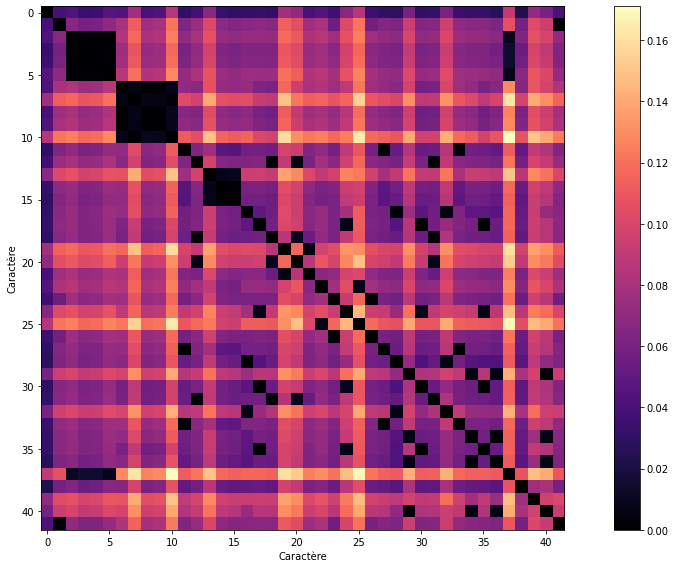

In [14]:
fig, ax = plt.subplots(figsize = (14,8))

im = plt.imshow(distance_matrix, cmap="magma")
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xlabel('Caractère')
ax.set_ylabel('Caractère')

fig.tight_layout()
plt.savefig('distance_caractere.png')
plt.show()